In [1]:
# Setup
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import numpy as np

sys.path.insert(0, '..')
plt.rcParams['figure.figsize'] = [10, 8]

from graph import Graph
from walkers import RandomWalker, GreedyUnbiasedWalker
from simulator import Simulator

Conjecture for performance of expected degree distribution: The closer the score is to expected degree, the better the performance.


Let $d_i$ be the degree distubution, $p_i$ be its corresponding probabilty distribution, $n$ be the number of degrees, and $d_{exp}$ be the expected degree.

Performance score: $\LARGE \sum (\frac{d_i^2p_i}{d_{exp}})(1+e^{(4-d_{min})})$, where $d_{min}$ is the smallest degree.


In [2]:
def score(d_dist, exp_d):
    score = 0
#     deg_prob = {}
    for key in d_dist:
        score += key*(key*d_dist[key]/exp_d)
#         deg_prob[key] = key*d_dist[key]
#     d_sort = sorted(d_dist, key=d_dist.get, reverse=True )
    score += score * np.exp(4-min(d_dist.keys()))
    return round(score, 5)

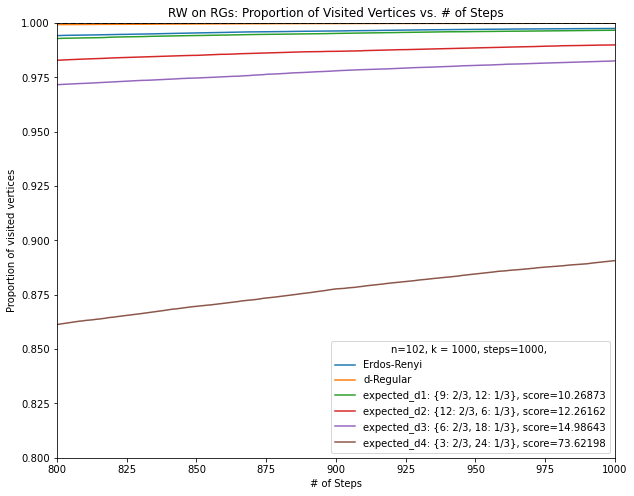

In [3]:
n, d, steps, walker_class, k = 102, 10, 1000, RandomWalker, 1000
d_p1, d_p2, d_p3, d_p4 = {9: 2/3, 12:1/3}, {12: 2/3, 6: 1/3}, {6: 2/3, 18: 1/3}, {3: 2/3, 24: 1/3}
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, k)
ed1 = Simulator.simulate_w_on_ed_visited_prop(n, d_p1, steps, walker_class, None, k)
ed2 = Simulator.simulate_w_on_ed_visited_prop(n, d_p2, steps, walker_class, None, k)
ed3 = Simulator.simulate_w_on_ed_visited_prop(n, d_p3, steps, walker_class, None, k)
ed4 = Simulator.simulate_w_on_ed_visited_prop(n, d_p4, steps, walker_class, None, k)
t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
plt.plot(t, ed1, label='expected_d1: {9: 2/3, 12: 1/3}, score='+str(score(d_p1, d)))
plt.plot(t, ed2, label='expected_d2: {12: 2/3, 6: 1/3}, score='+str(score(d_p2, d)))
plt.plot(t, ed3, label='expected_d3: {6: 2/3, 18: 1/3}, score='+str(score(d_p3, d)))
plt.plot(t, ed4, label='expected_d4: {3: 2/3, 24: 1/3}, score='+str(score(d_p4, d)))
plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')
plt.xlim(800,1000)
plt.ylim(0.8, 1)
plt.show()

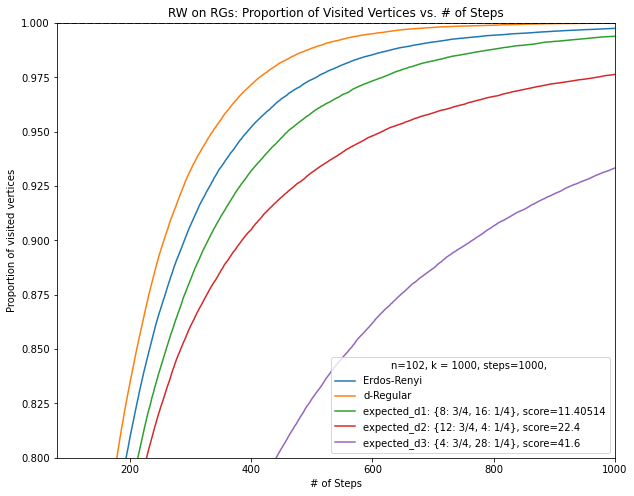

In [4]:
n, d, steps, walker_class, k = 102, 10, 1000, RandomWalker, 1000
d_p1, d_p2, d_p3 = {8: 3/4, 16: 1/4}, {12: 3/4, 4: 1/4}, {4: 3/4, 28: 1/4}
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, k)
ed1 = Simulator.simulate_w_on_ed_visited_prop(n, d_p1, steps, walker_class, None, k)
ed2 = Simulator.simulate_w_on_ed_visited_prop(n, d_p2, steps, walker_class, None, k)
ed3 = Simulator.simulate_w_on_ed_visited_prop(n, d_p3, steps, walker_class, None, k)
t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
plt.plot(t, ed1, label='expected_d1: {8: 3/4, 16: 1/4}, score='+str(score(d_p1, d)))
plt.plot(t, ed2, label='expected_d2: {12: 3/4, 4: 1/4}, score='+str(score(d_p2, d)))
plt.plot(t, ed3, label='expected_d3: {4: 3/4, 28: 1/4}, score='+str(score(d_p3, d)))
plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')
plt.xlim(80,1000)
plt.ylim(0.8, 1)
plt.show()

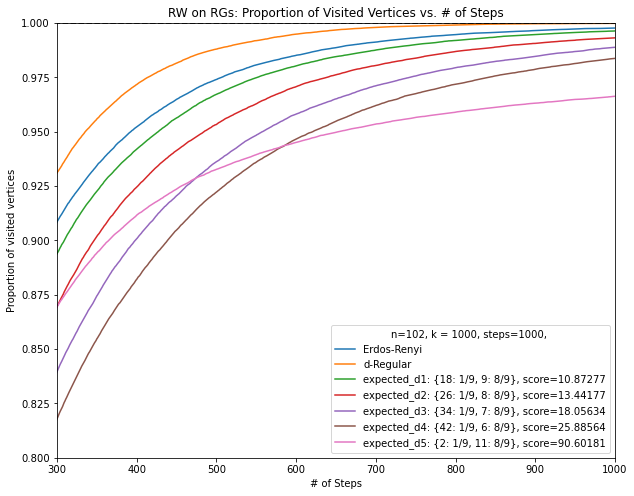

In [5]:
n, d, steps, walker_class, k = 102, 10, 1000, RandomWalker, 1000
d_p1, d_p2, d_p3 = {18: 1/9, 9: 8/9}, {26: 1/9, 8: 8/9}, {34: 1/9, 7: 8/9}
d_p4, d_p5 = {42: 1/9, 6: 8/9}, {2: 1/9, 11: 8/9}
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, k)
ed1 = Simulator.simulate_w_on_ed_visited_prop(n, d_p1, steps, walker_class, None, k)
ed2 = Simulator.simulate_w_on_ed_visited_prop(n, d_p2, steps, walker_class, None, k)
ed3 = Simulator.simulate_w_on_ed_visited_prop(n, d_p3, steps, walker_class, None, k)
ed4 = Simulator.simulate_w_on_ed_visited_prop(n, d_p4, steps, walker_class, None, k)
ed5 = Simulator.simulate_w_on_ed_visited_prop(n, d_p5, steps, walker_class, None, k)
t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
plt.plot(t, ed1, label='expected_d1: {18: 1/9, 9: 8/9}, score='+str(score(d_p1, d)))
plt.plot(t, ed2, label='expected_d2: {26: 1/9, 8: 8/9}, score='+str(score(d_p2, d)))
plt.plot(t, ed3, label='expected_d3: {34: 1/9, 7: 8/9}, score='+str(score(d_p3, d)))
plt.plot(t, ed4, label='expected_d4: {42: 1/9, 6: 8/9}, score='+str(score(d_p4, d)))
plt.plot(t, ed5, label='expected_d5: {2: 1/9, 11: 8/9}, score='+str(score(d_p5, d)))
plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')
plt.xlim(300,1000)
plt.ylim(0.8, 1)
plt.show()

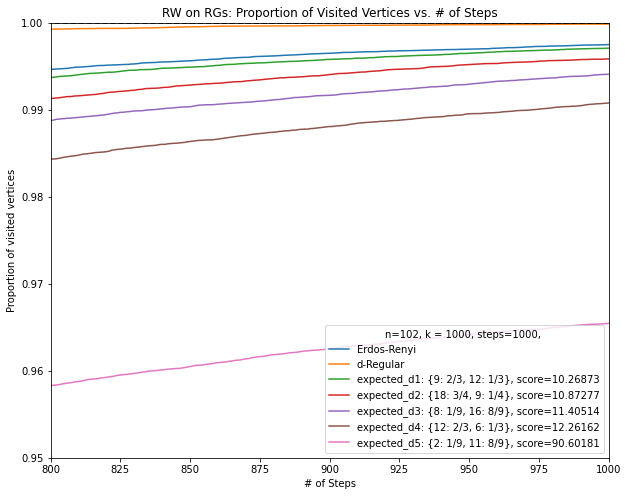

In [6]:
n, d, steps, walker_class, k = 102, 10, 1000, RandomWalker, 1000
d_p1, d_p2, d_p3, d_p4 = {9: 2/3, 12: 1/3}, {18: 1/9, 9: 8/9}, {8: 3/4, 16: 1/4}, {12: 2/3, 6: 1/3}
d_p5 = {2: 1/9, 11: 8/9}
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, k)
ed1 = Simulator.simulate_w_on_ed_visited_prop(n, d_p1, steps, walker_class, None, k)
ed2 = Simulator.simulate_w_on_ed_visited_prop(n, d_p2, steps, walker_class, None, k)
ed3 = Simulator.simulate_w_on_ed_visited_prop(n, d_p3, steps, walker_class, None, k)
ed4 = Simulator.simulate_w_on_ed_visited_prop(n, d_p4, steps, walker_class, None, k)
ed5 = Simulator.simulate_w_on_ed_visited_prop(n, d_p5, steps, walker_class, None, k)
t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
plt.plot(t, ed1, label='expected_d1: {9: 2/3, 12: 1/3}, score='+str(score(d_p1, d)))
plt.plot(t, ed2, label='expected_d2: {18: 3/4, 9: 1/4}, score='+str(score(d_p2, d)))
plt.plot(t, ed3, label='expected_d3: {8: 1/9, 16: 8/9}, score='+str(score(d_p3, d)))
plt.plot(t, ed4, label='expected_d4: {12: 2/3, 6: 1/3}, score='+str(score(d_p4, d)))
plt.plot(t, ed5, label='expected_d5: {2: 1/9, 11: 8/9}, score='+str(score(d_p5, d)))
plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')
plt.xlim(800,1000)
plt.ylim(0.95, 1)
plt.show()

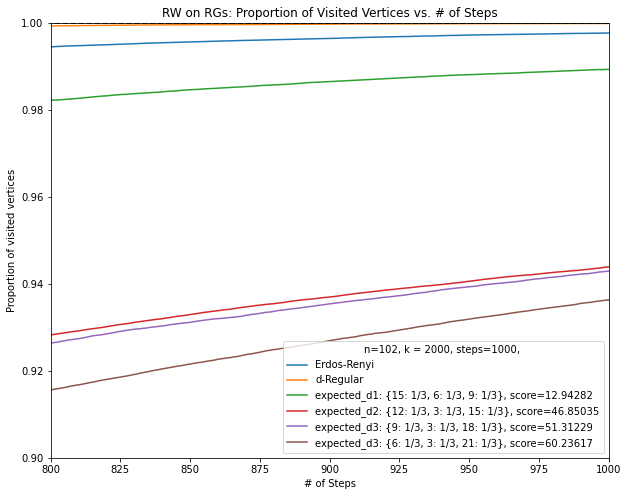

In [7]:
n, d, steps, walker_class, k = 102, 10, 1000, RandomWalker, 2000
d_p1, d_p2, d_p3 = {15: 1/3, 6: 1/3, 9: 1/3}, {12: 1/3, 3: 1/3, 15: 1/3}, {9: 1/3, 3: 1/3, 18: 1/3}
d_p4 = {6: 1/3, 3: 1/3, 21: 1/3}
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, k)
ed1 = Simulator.simulate_w_on_ed_visited_prop(n, d_p1, steps, walker_class, None, k)
ed2 = Simulator.simulate_w_on_ed_visited_prop(n, d_p2, steps, walker_class, None, k)
ed3 = Simulator.simulate_w_on_ed_visited_prop(n, d_p3, steps, walker_class, None, k)
ed4 = Simulator.simulate_w_on_ed_visited_prop(n, d_p4, steps, walker_class, None, k)
t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
plt.plot(t, ed1, label='expected_d1: {15: 1/3, 6: 1/3, 9: 1/3}, score='+str(score(d_p1, d)))
plt.plot(t, ed2, label='expected_d2: {12: 1/3, 3: 1/3, 15: 1/3}, score='+str(score(d_p2, d)))
plt.plot(t, ed3, label='expected_d3: {9: 1/3, 3: 1/3, 18: 1/3}, score='+str(score(d_p3, d)))
plt.plot(t, ed4, label='expected_d3: {6: 1/3, 3: 1/3, 21: 1/3}, score='+str(score(d_p4, d)))
plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')
plt.xlim(800,1000)
plt.ylim(0.9,1)
plt.show()

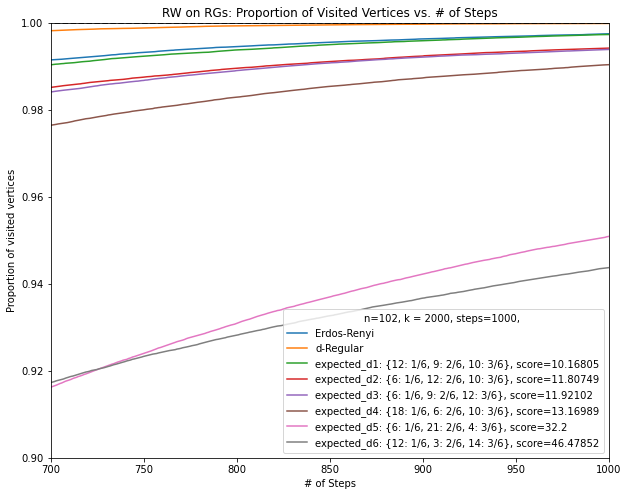

In [8]:
n, d, steps, walker_class, k = 102, 10, 1000, RandomWalker, 2000
d_p1, d_p2, d_p3 = {12: 1/6, 9: 2/6, 10: 3/6}, {6: 1/6, 12: 2/6, 10: 3/6}, {6: 1/6, 9: 2/6, 12: 3/6}, 
d_p4, d_p5, d_p6 = {18: 1/6, 6: 2/6, 10: 3/6}, {6: 1/6, 21: 2/6, 4: 3/6}, {12: 1/6, 3: 2/6, 14: 3/6},
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, k)
ed1 = Simulator.simulate_w_on_ed_visited_prop(n, d_p1, steps, walker_class, None, k)
ed2 = Simulator.simulate_w_on_ed_visited_prop(n, d_p2, steps, walker_class, None, k)
ed3 = Simulator.simulate_w_on_ed_visited_prop(n, d_p3, steps, walker_class, None, k)
ed4 = Simulator.simulate_w_on_ed_visited_prop(n, d_p4, steps, walker_class, None, k)
ed5 = Simulator.simulate_w_on_ed_visited_prop(n, d_p5, steps, walker_class, None, k)
ed6 = Simulator.simulate_w_on_ed_visited_prop(n, d_p6, steps, walker_class, None, k)
t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
plt.plot(t, ed1, label='expected_d1: {12: 1/6, 9: 2/6, 10: 3/6}, score='+str(score(d_p1, d)))
plt.plot(t, ed2, label='expected_d2: {6: 1/6, 12: 2/6, 10: 3/6}, score='+str(score(d_p2, d)))
plt.plot(t, ed3, label='expected_d3: {6: 1/6, 9: 2/6, 12: 3/6}, score='+str(score(d_p3, d)))
plt.plot(t, ed4, label='expected_d4: {18: 1/6, 6: 2/6, 10: 3/6}, score='+str(score(d_p4, d)))
plt.plot(t, ed5, label='expected_d5: {6: 1/6, 21: 2/6, 4: 3/6}, score='+str(score(d_p5, d)))
plt.plot(t, ed6, label='expected_d6: {12: 1/6, 3: 2/6, 14: 3/6}, score='+str(score(d_p6, d)))
plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')
plt.xlim(700,1000)
plt.ylim(0.9, 1)
plt.show()

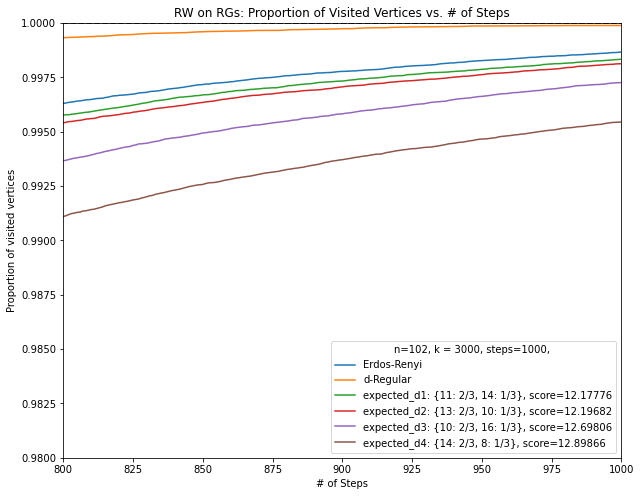

In [9]:
n, d, steps, walker_class, k = 102, 12, 1000, RandomWalker, 3000
d_p1, d_p2, d_p3, d_p4 = {11: 2/3, 14: 1/3}, {13: 2/3, 10: 1/3}, {10: 2/3, 16: 1/3}, {14: 2/3, 8: 1/3}
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, k)
ed1 = Simulator.simulate_w_on_ed_visited_prop(n, d_p1, steps, walker_class, None, k)
ed2 = Simulator.simulate_w_on_ed_visited_prop(n, d_p2, steps, walker_class, None, k)
ed3 = Simulator.simulate_w_on_ed_visited_prop(n, d_p3, steps, walker_class, None, k)
ed4 = Simulator.simulate_w_on_ed_visited_prop(n, d_p4, steps, walker_class, None, k)
t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
plt.plot(t, ed1, label='expected_d1: {11: 2/3, 14: 1/3}, score='+str(score(d_p1, d)))
plt.plot(t, ed2, label='expected_d2: {13: 2/3, 10: 1/3}, score='+str(score(d_p2, d)))
plt.plot(t, ed3, label='expected_d3: {10: 2/3, 16: 1/3}, score='+str(score(d_p3, d)))
plt.plot(t, ed4, label='expected_d4: {14: 2/3, 8: 1/3}, score='+str(score(d_p4, d)))
plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')
plt.xlim(800,1000)
plt.ylim(0.98, 1)
plt.show()

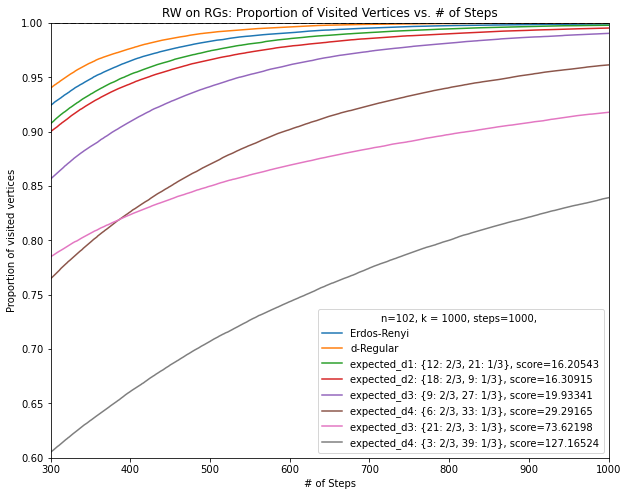

In [10]:
n, d, steps, walker_class, k = 102, 15, 1000, RandomWalker, 1000
d_p1, d_p2, d_p3, d_p4 = {12:2/3, 21:1/3}, {18:2/3, 9:1/3}, {9:2/3, 27:1/3}, {6:2/3, 33:1/3}
d_p5, d_p6 = {21:2/3, 3:1/3}, {3:2/3, 39:1/3}
er = Simulator.simulate_w_on_rg_visited_prop(n, d, steps, walker_class, None, k)
k_reg = Simulator.simulate_w_on_k_regular_visited_prop(n, d, steps, walker_class, None, k)
ed1 = Simulator.simulate_w_on_ed_visited_prop(n, d_p1, steps, walker_class, None, k)
ed2 = Simulator.simulate_w_on_ed_visited_prop(n, d_p2, steps, walker_class, None, k)
ed3 = Simulator.simulate_w_on_ed_visited_prop(n, d_p3, steps, walker_class, None, k)
ed4 = Simulator.simulate_w_on_ed_visited_prop(n, d_p4, steps, walker_class, None, k)
ed5 = Simulator.simulate_w_on_ed_visited_prop(n, d_p5, steps, walker_class, None, k)
ed6 = Simulator.simulate_w_on_ed_visited_prop(n, d_p6, steps, walker_class, None, k)
t = np.arange(1, len(er)+1, step=1)
plt.plot(t, er, label='Erdos-Renyi')
plt.plot(t, k_reg, label='d-Regular')
plt.plot(t, ed1, label='expected_d1: {12: 2/3, 21: 1/3}, score='+str(score(d_p1, d)))
plt.plot(t, ed2, label='expected_d2: {18: 2/3, 9: 1/3}, score='+str(score(d_p2, d)))
plt.plot(t, ed3, label='expected_d3: {9: 2/3, 27: 1/3}, score='+str(score(d_p3, d)))
plt.plot(t, ed4, label='expected_d4: {6: 2/3, 33: 1/3}, score='+str(score(d_p4, d)))
plt.plot(t, ed5, label='expected_d3: {21: 2/3, 3: 1/3}, score='+str(score(d_p5, d)))
plt.plot(t, ed6, label='expected_d4: {3: 2/3, 39: 1/3}, score='+str(score(d_p6, d)))
plt.title("RW on RGs: Proportion of Visited Vertices vs. # of Steps")
plt.xlabel("# of Steps")
plt.ylabel("Proportion of visited vertices")
plt.hlines(1, 0, len(t), colors='black', linestyles='dashed')
plt.legend(title='n={:n}, k = {:d}, steps={:d}, '.format(n, k, steps), loc='lower right')
plt.xlim(300,1000)
plt.ylim(0.6, 1)
plt.show()

Let $d_1 = x, d_2 = 10-x, p_1 = \frac{x}{1000}, p_2 = 1-\frac{x}{1000}, d_{exp}=d_1 + d_2, p_1 < p_2$:

In [11]:
import sympy as sp
sp.var('x')
d_1, d_2 = x, 10-x
p_1, p_2 = x/1000, 1-x/1000
p_d = 1000
d_exp = d_1+d_2

sum_comp = (d_1**2*p_1)/d_exp + (d_2**2*p_2)/d_exp
# d_1 < d_2
weight1 = sum_comp * sp.exp(4-d_1)
# d_2 < d_1
weight2 = sum_comp * sp.exp(4-d_2)
f1 = sum_comp + weight1
f2 = sum_comp + weight2
f1

x**3/10000 + (1 - x/1000)*(10 - x)**2/10 + (x**3/10000 + (1 - x/1000)*(10 - x)**2/10)*exp(4 - x)

In [12]:
f2

x**3/10000 + (1 - x/1000)*(10 - x)**2/10 + (x**3/10000 + (1 - x/1000)*(10 - x)**2/10)*exp(x - 6)

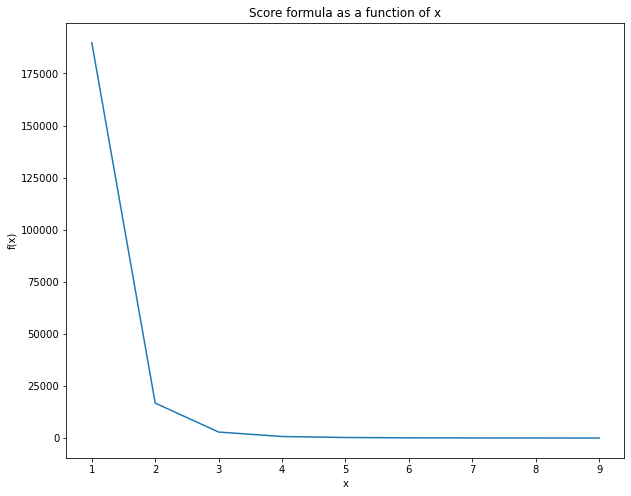

In [22]:
def f(x):
    d_1, d_2 = x, 10-x
    p_1, p_2 = x/1000, 1-x/1000
    p_d = 1000
    d_exp = d_1*p_1*d_2*p_2
    
    sum_comp = (d_1**2*p_1)/d_exp + (d_2**2*p_2)/d_exp
    if x.any() <= 4:
        weight = sum_comp * np.exp(4-d_1)
    else:
        weight = sum_comp * np.exp(4-d_2)
    return sum_comp + weight

x = np.arange(1, 10, 1)
plt.plot(x, f(x))
plt.title("Score formula as a function of x")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()